In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate, AUROC

In [2]:
bs = 64

In [3]:
np.random.seed(233)
data = ImageDataBunch.from_folder(path='/home/ike/Data/kaggledayschina/kaggledays-china/train3c', train='.', valid_pct=0.2, ds_tfms=get_transforms(flip_vert=True, max_rotate=45), size=224, bs=bs).normalize(imagenet_stats)

In [4]:
data.classes

['nonstar', 'star']

In [5]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, AUROC()])

In [6]:
learn.fit_one_cycle(40)

epoch,train_loss,valid_loss,error_rate,auroc,time
0,1.152107,0.669255,0.382470,0.590223,00:55
1,1.029757,0.536264,0.270916,0.642560,00:51
2,0.876613,0.522109,0.248008,0.644502,00:51
3,0.748451,0.553558,0.228088,0.592412,00:51
4,0.638110,0.468216,0.181275,0.682106,00:51
5,0.572982,0.435519,0.186255,0.700778,00:50
6,0.522194,0.459104,0.181275,0.634209,00:51
7,0.488053,0.450420,0.184263,0.668972,00:51
8,0.468357,0.438028,0.175299,0.673577,00:51
9,0.463882,0.476172,0.168327,0.593517,00:51


In [7]:
learn.save('stage-1')

In [8]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


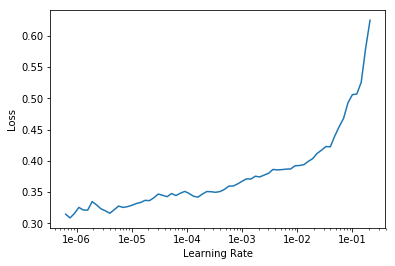

In [9]:
learn.recorder.plot()

In [11]:
learn.load('stage-1')
learn.unfreeze()

In [12]:
learn.fit_one_cycle(13, slice(3e-6, 2e-4))

epoch,train_loss,valid_loss,error_rate,auroc,time
0,0.352451,0.376497,0.161355,0.800025,01:09
1,0.352600,0.380767,0.158367,0.793410,01:09
2,0.352453,0.373327,0.159363,0.809748,01:09
3,0.344736,0.373034,0.155378,0.807058,01:09
4,0.338194,0.372654,0.156374,0.810050,01:09
5,0.334192,0.360465,0.156374,0.829923,01:09
6,0.328236,0.353160,0.153386,0.834500,01:09
7,0.324346,0.356521,0.154382,0.827995,01:09
8,0.317480,0.358331,0.151394,0.825915,01:09
9,0.316336,0.358638,0.149402,0.825504,01:09


In [ ]:
learn.fit_one_cycle(10, max_lr=slice(1e-7, 1e-6))

In [ ]:
learn.load('stage-1')

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(1e-5, 1e-3))

In [13]:
learn.save('stage-2')

In [ ]:
learn.save('stage-3')

In [ ]:
learn.load('stage-3')

In [14]:
learn.export('/home/ike/Data/kaggledayschina/kaggledays-china/export-5.pth')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
learn.export()

In [15]:
import pandas as pd
import numpy as np

submission = pd.read_csv("/home/ike/Data/kaggledayschina/kaggledays-china/test.csv")

In [16]:
submission['fileName'] = submission.id + '.png'

In [17]:
testset = ImageList.from_df(submission, path="/home/ike/Data/kaggledayschina/kaggledays-china/test3c/test3c_data/", cols = 'fileName')

In [18]:
len(testset)

1257

In [19]:
learn = load_learner('/home/ike/Data/kaggledayschina/kaggledays-china/', file='export-5.pth', test=testset)
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [ ]:
preds

In [20]:
submission['is_star'] = np.array(preds.tolist())[:, 1]

In [ ]:
submission.head()

In [21]:
submission[['id', 'is_star']].to_csv("submission_12.csv", header=True, index=False)